In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split,KFold
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [2]:
def get_X_and_Y(filename):
    data = pd.read_csv(filename)
    dataX = data.drop(columns=['Creditability']).values
    dataY = data['Creditability'].values
    return dataX,dataY

In [3]:
# trainX,trainY = get_X_and_Y('data/train.csv')
# testX,testY = get_X_and_Y('data/test.csv')
X,Y = get_X_and_Y('data/full_data.csv')

In [4]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.20, random_state=42)

In [5]:
trainX.shape,trainY.shape,testX.shape,testY.shape

((800, 20), (800,), (200, 20), (200,))

In [6]:
parameter_decision_tree = {
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(2,5,10,20)
}

In [7]:
parameter_random_forest = {
    'criterion':('gini','entropy'),
    'max_depth':(2,5,10,20),
    'n_estimators':(10,100,200)
}

In [9]:
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameter_random_forest, cv=10,verbose=2) 
dt_clf = GridSearchCV(DecisionTreeClassifier(), parameter_decision_tree, cv=10,verbose=2) 

In [10]:
rf_clf.fit(trainX,trainY)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] ..... criterion=gini, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=10 ....................
[CV] .

[CV] .... criterion=gini, max_depth=5, n_estimators=200, total=   0.5s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .... criterion=gini, max_depth=10, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=10 ...................
[CV] .

[CV] ... criterion=gini, max_depth=20, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_depth=20, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=200, total=   0.8s
[CV] criterion=gini, max_depth=20, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=10 .................
[CV] .

[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.2s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.2s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] .

[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.9s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.9s
[CV] criterion=entropy, max_depth=20, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=200, total=   0.8s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (2, 5, 10, 20), 'n_estimators': (10, 100, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [11]:
rf_clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [12]:
accuracy_score(trainY,rf_clf.predict(trainX)) 

0.98125

In [13]:
accuracy_score(testY,rf_clf.predict(testX)) 

0.755

In [15]:
dt_clf.fit(testX,testY)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... c

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, splitter=random ...................
[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, splitter=random ...................
[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, splitter=random ...................
[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] ...... criterion=gini, max_depth=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] ...... criterion=gini, max_depth=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] ...... criterion=gini, max_depth=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] .

[CV] . criterion=entropy, max_depth=20, splitter=random, total=   0.0s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': (2, 5, 10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [16]:
dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [17]:
accuracy_score(trainY,dt_clf.predict(trainX))

0.67375

In [18]:
accuracy_score(testY,dt_clf.predict(testX))

0.755

In [19]:
def plot_parameter_performance(model):
    scores = [i[1] for i in model.grid_scores_]
    print(model.grid_scores_[model.best_index_][0])
    plt.plot(range(len(scores)),scores,'-*',markevery=[model.best_index_],markerfacecolor='red',markersize=15)

/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


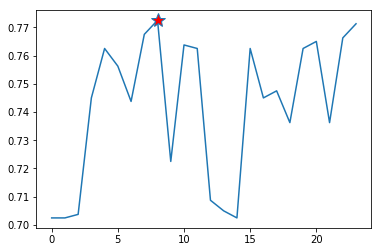

In [20]:
plot_parameter_performance(rf_clf)

/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


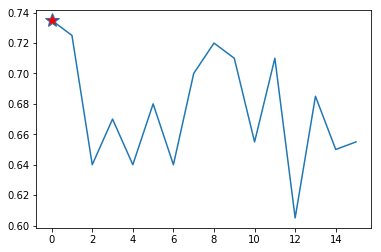

In [21]:
plot_parameter_performance(dt_clf)

In [25]:
def plot_learning_curve(model,trainX,trainY):
    train_sizes, train_scores, valid_scores = learning_curve(model, trainX, trainY, train_sizes=[100, 200, 300,400,500,600,719], cv=10)
    mean_train_score = pd.np.mean(train_scores,axis=1)
    mean_valid_score = pd.np.mean(valid_scores,axis=1)
    plt.plot(train_sizes,mean_train_score)
    plt.plot(train_sizes,mean_valid_score)

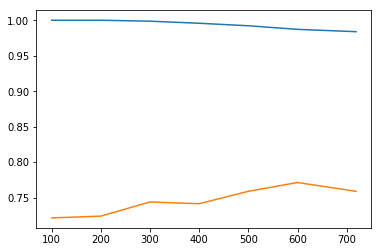

In [26]:
plot_learning_curve(rf_clf.best_estimator_,trainX,trainY)

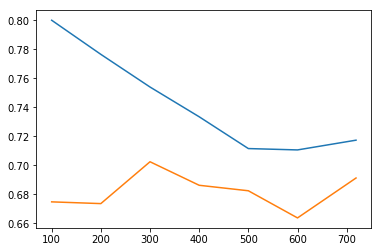

In [27]:
plot_learning_curve(dt_clf.best_estimator_,trainX,trainY)

## Question d)

In [29]:
kfold = KFold(n_splits=10)

In [31]:
rf_validation_errors = []
dt_validation_errors = []

In [33]:
for train_index,test_index in kfold.split(trainX):
    train_x = trainX[train_index]
    train_y = trainY[train_index]
    val_x = trainX[test_index]
    val_y = trainY[test_index]
    
    rf = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators =200)
    dt = DecisionTreeClassifier(criterion ='gini', max_depth= 2, splitter = 'best')
    
    rf.fit(train_x,train_y)
    dt.fit(train_x,train_y)
    
    rf_validation_errors.append(1.0 - accuracy_score(val_y,rf.predict(val_x)))
    dt_validation_errors.append(1.0 - accuracy_score(val_y,dt.predict(val_x)))

In [34]:
len(rf_validation_errors),len(dt_validation_errors)

(10, 10)

In [35]:
rf_error_variance = pd.np.var(rf_validation_errors)
dt_error_variance = pd.np.var(dt_validation_errors)

In [36]:
rf_error_variance,dt_error_variance

(0.0009749999999999996, 0.0027015625000000017)

In [39]:
joblib.dump(rf_clf.best_estimator_, 'data/rf_best.joblib') 
joblib.dump(dt_clf.best_estimator_, 'data/dt_best.joblib') 

['data/dt_best.joblib']

In [40]:
rf_loaded = joblib.load('data/rf_best.joblib')
dt_loaded = joblib.load('data/dt_best.joblib')

In [41]:
accuracy_score(testY,rf_loaded.predict(testX))

0.755

In [42]:
accuracy_score(testY,dt_loaded.predict(testX))

0.755